In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('spam.csv',encoding='latin-1')
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data = data.rename(columns={'v1': 'type','v2': 'message'})
data

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
data.isnull().any()

type       False
message    False
dtype: bool

In [5]:
data["type"].unique()

array(['ham', 'spam'], dtype=object)

In [6]:
data.groupby('type').describe()

message                                                               
       count unique                                                top freq
type                                                                       
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [7]:
numdata=pd.DataFrame()
data["sentence"]=data["message"].apply(nltk.sent_tokenize)
data["words"]=data["message"].apply(nltk.word_tokenize)
numdata['type']=data['type']
numdata['chars_no'] = data['message'].str.len()
numdata['sents_no'] = data['sentence'].apply(len)
numdata['words_no'] = data['words'].apply(len)

In [8]:
def avg_word_len(msg):
    s=0
    for word in msg:
        s=s+len(word)
    return s/len(msg)

numdata["avg_word_len"] = data["words"].apply(lambda x: avg_word_len(x))

In [9]:
numdata["sp_chars"] = data["message"].apply(lambda x:len(x)-len(re.findall('[\w]',x)))
numdata["numeric"] = data["message"].apply(lambda x:len(re.findall('[\d]',x)))
numdata["uppercase"] = data["message"].apply(lambda x:len(re.findall('[A-Z]',x)))

In [10]:
sw=set(nltk.corpus.stopwords.words('english'))

def x(msg):
    a=[]
    for i in msg:
        if i not in sw:
            a.append(i)
    return a
data["msg_sw"]=data["words"].apply(x)

numdata["without_sw"] = data["msg_sw"].apply(len)
numdata["sw_no"] = numdata["words_no"]-numdata["without_sw"]

In [11]:
data

,type,message,sentence,words,msg_sw
0,ham,"Go until jurong point, crazy.. Available only ...","[Go until jurong point, crazy.., Available onl...","[Go, until, jurong, point, ,, crazy.., Availab...","[Go, jurong, point, ,, crazy.., Available, bug..."
1,ham,Ok lar... Joking wif u oni...,"[Ok lar..., Joking wif u oni...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,[Free entry in 2 a wkly comp to win FA Cup fin...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,[U dun say so early hor... U c already then sa...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, early, hor, ..., U, c, already, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah I don't think he goes to usf, he lives ar...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, n't, think, goes, usf, ,, lives, arou..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,[FreeMsg Hey there darling it's been 3 week's ...,"[FreeMsg, Hey, there, darling, it, 's, been, 3...","[FreeMsg, Hey, darling, 's, 3, week, 's, word,..."
6,ham,Even my brother is not like to speak with me. ...,[Even my brother is not like to speak with me....,"[Even, my, brother, is, not, like, to, speak, ...","[Even, brother, like, speak, ., They, treat, l..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,[As per your request 'Melle Melle (Oru Minnami...,"[As, per, your, request, 'Melle, Melle, (, Oru...","[As, per, request, 'Melle, Melle, (, Oru, Minn..."
8,spam,WINNER!! As a valued network customer you have...,"[WINNER!!, As a valued network customer you ha...","[WINNER, !, !, As, a, valued, network, custome...","[WINNER, !, !, As, valued, network, customer, ..."
9,spam,Had your mobile 11 months or more? U R entitle...,"[Had your mobile 11 months or more?, U R entit...","[Had, your, mobile, 11, months, or, more, ?, U...","[Had, mobile, 11, months, ?, U, R, entitled, U..."


In [12]:
numdata

,type,chars_no,sents_no,words_no,avg_word_len,sp_chars,numeric,uppercase,without_sw,sw_no
0,ham,111,2,23,4.000000,28,0,3,19,4
1,ham,29,2,8,3.000000,11,0,2,8,0
2,spam,155,2,37,3.459459,33,25,10,32,5
3,ham,49,1,13,3.000000,16,0,2,11,2
4,ham,61,1,15,3.266667,14,0,2,10,5
5,spam,148,4,39,3.000000,40,4,7,26,13
6,ham,77,2,18,3.444444,17,0,2,11,7
7,ham,160,2,30,4.500000,31,1,10,21,9
8,spam,158,5,32,4.156250,32,19,12,26,6
9,spam,154,3,31,4.064516,30,13,14,22,9


In [13]:
numdata.groupby('type')["avg_word_len"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
ham,4825.0,3.44600,1.004713,1.000000,3.000000,3.333333,3.750000,49.0000
spam,747.0,4.27812,0.680074,2.789474,3.810096,4.192308,4.641429,9.1875


In [14]:
numdata.groupby('type')["chars_no"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
ham,4825.0,71.023627,58.016023,2.0,33.0,52.0,92.0,910.0
spam,747.0,138.866131,29.183082,13.0,132.5,149.0,157.0,224.0


In [15]:
numdata.groupby('type')["words_no"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
ham,4825.0,17.076891,13.876308,1.0,8.0,13.0,22.0,219.0
spam,747.0,27.706827,6.768560,2.0,25.0,29.0,32.0,44.0


In [16]:
numdata.groupby('type')["sents_no"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
ham,4825.0,1.832332,1.431214,1.0,1.0,1.0,2.0,38.0
spam,747.0,3.020080,1.538034,1.0,2.0,3.0,4.0,9.0


In [17]:
numdata.groupby('type')["sp_chars"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
ham,4825.0,17.291813,14.990677,0.0,8.0,13.0,22.0,253.0
spam,747.0,29.041499,7.319564,1.0,27.0,30.0,34.0,50.0


[Text(0, 0, 'spam'), Text(0, 0, 'ham')]

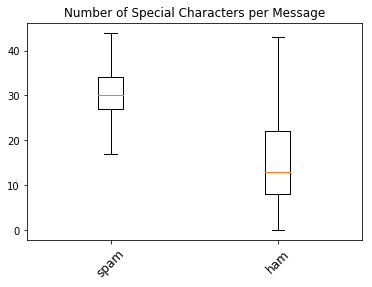

In [18]:
y=numdata.groupby("type")
x=[y["sp_chars"].get_group('spam'),y["sp_chars"].get_group('ham')]
fig, ax = plt.subplots()
ax.boxplot(x,0,'')
ax.set_title('Number of Special Characters per Message')
ax.set_xticklabels(['spam','ham'],rotation=45, fontsize=12)

In [19]:
numdata.groupby('type')["numeric"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
ham,4825.0,0.299275,1.063086,0.0,0.0,0.0,0.0,23.0
spam,747.0,15.759036,8.755896,0.0,10.0,16.0,22.0,47.0


[Text(0, 0, 'spam'), Text(0, 0, 'ham')]

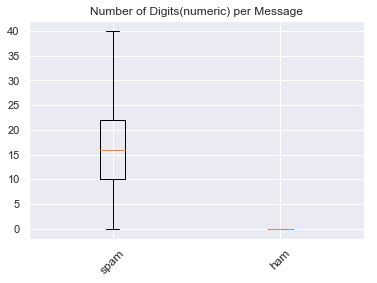

In [20]:
sns.set()
y=numdata.groupby("type")
x=[y["numeric"].get_group('spam'),y["numeric"].get_group('ham')]
fig, ax = plt.subplots()
ax.boxplot(x,0,'')
ax.set_title('Number of Digits(numeric) per Message')
ax.set_xticklabels(['spam','ham'],rotation=45, fontsize=12)

In [21]:
numdata.groupby('type')["uppercase"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
ham,4825.0,3.961036,10.099676,0.0,1.0,2.0,3.0,127.0
spam,747.0,15.428380,12.306787,0.0,7.0,13.0,21.0,128.0


[Text(0, 0, 'spam'), Text(0, 0, 'ham')]

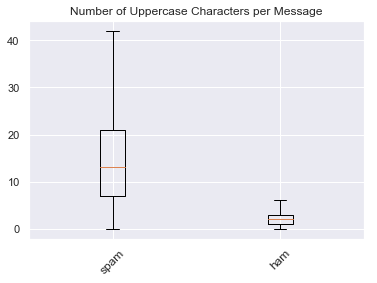

In [22]:
y=numdata.groupby("type")
x=[y["uppercase"].get_group('spam'),y["uppercase"].get_group('ham')]
fig, ax = plt.subplots()
ax.boxplot(x,0,'')
ax.set_title('Number of Uppercase Characters per Message')
ax.set_xticklabels(['spam','ham'],rotation=45, fontsize=12)

In [23]:
numdata.groupby('type')["without_sw"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
ham,4825.0,12.255337,10.221058,1.0,6.0,9.0,16.0,210.0
spam,747.0,22.048193,6.171180,2.0,19.0,23.0,26.0,38.0


[Text(0, 0, 'spam'), Text(0, 0, 'ham')]

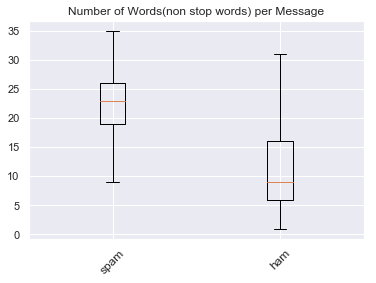

In [24]:
y=numdata.groupby("type")
x=[y["without_sw"].get_group('spam'),y["without_sw"].get_group('ham')]
fig, ax = plt.subplots()
ax.boxplot(x,0,'')
ax.set_title('Number of Words(non stop words) per Message')
ax.set_xticklabels(['spam','ham'],rotation=45, fontsize=12)

In [25]:
numdata.groupby('type')["sw_no"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
ham,4825.0,4.821554,5.042221,0.0,2.0,3.0,6.0,89.0
spam,747.0,5.658635,3.011584,0.0,3.0,6.0,8.0,17.0


[Text(0, 0, 'spam'), Text(0, 0, 'ham')]

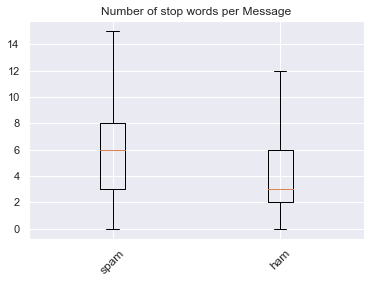

In [26]:
y=numdata.groupby("type")
x=[y["sw_no"].get_group('spam'),y["sw_no"].get_group('ham')]
fig, ax = plt.subplots()
ax.boxplot(x,0,'')
ax.set_title('Number of stop words per Message')
ax.set_xticklabels(['spam','ham'],rotation=45, fontsize=12)

In [27]:
data1=pd.DataFrame()
data1["type"]=data["type"]

abbv={
    "'s":"is",
    "'re":"are",
    "'m":"am",
    "'ve":"have",
    "'ll":"will",
    "n't":"not",
    "ca":"can",
    "wo":"will",
    "ur":"your",
    "u":"you",
    "txt":"text",
    "dont":"don't",
    "do not":"don't",
    "ì_":"don't",
    "pls":"please",
    "lt":"don't",
    "gt":"don't",
    "hi":"don't",
    '\s+':' ', # replace multi space with one single space
}
punct=['.',';','@','?','&','!','*',':',')','...','0','1','2','3','4','5','6','7','8','9','#','$',',',"''",'-','(','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

def fun(l):
    x=[]
    for w in l:
        x.append(w.lower())
    return x

def x(msg):
    a=[]
    for i in msg:
        if i not in sw:
            a.append(i)
    return a

def funct(msg):
    x=[]
    for i in msg:
        if i in abbv:
            x.append(abbv[i])
        elif i in punct:
            pass
        else:
            x.append(i)
    return x


data1["words"]=data["words"].apply(fun)
data1["clean_words"]=data1["words"].apply(funct)
data1["clean_no_sw"]=data1["clean_words"].apply(x)

In [28]:
data1

,type,words,clean_words,clean_no_sw
0,ham,"[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,...","[go, jurong, point, crazy.., available, bugis,..."
1,ham,"[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, joking, wif, you, oni]","[ok, lar, joking, wif, oni]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, wkly, comp, to, win, fa, cup...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[u, dun, say, so, early, hor, ..., u, c, alrea...","[you, dun, say, so, early, hor, you, already, ...","[dun, say, early, hor, already, say]"
4,ham,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah, do, not, think, he, goes, to, usf, he, l...","[nah, think, goes, usf, lives, around, though]"
5,spam,"[freemsg, hey, there, darling, it, 's, been, 3...","[freemsg, hey, there, darling, it, is, been, w...","[freemsg, hey, darling, week, word, back, 'd, ..."
6,ham,"[even, my, brother, is, not, like, to, speak, ...","[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
7,ham,"[as, per, your, request, 'melle, melle, (, oru...","[as, per, your, request, 'melle, melle, oru, m...","[per, request, 'melle, melle, oru, minnaminung..."
8,spam,"[winner, !, !, as, a, valued, network, custome...","[winner, as, valued, network, customer, you, h...","[winner, valued, network, customer, selected, ..."
9,spam,"[had, your, mobile, 11, months, or, more, ?, u...","[had, your, mobile, 11, months, or, more, you,...","[mobile, 11, months, entitled, update, latest,..."


In [29]:
s=dict()
def abc(l):
    for i in l:
        if i in s:
            s[i]+=1
        else:
            s[i]=1
            
data1["clean_no_sw"].apply(abc)
s=sorted(s.items(), key=lambda x: x[1],reverse=True)[:50]

In [30]:
s

[('call', 576),
 ('get', 385),
 ('text', 358),
 ('go', 276),
 ('free', 275),
 ('know', 259),
 ('ok', 251),
 ('got', 249),
 ('like', 244),
 ('please', 244),
 ('good', 239),
 ('come', 227),
 ('time', 214),
 ('day', 194),
 ('want', 193),
 ('send', 191),
 ('love', 190),
 ('one', 175),
 ('going', 172),
 ('need', 165),
 ('home', 160),
 ('sorry', 158),
 ('lor', 156),
 ('see', 156),
 ('still', 154),
 ('back', 152),
 ('stop', 150),
 ('today', 145),
 ('reply', 142),
 ('da', 140),
 ('mobile', 138),
 ('tell', 137),
 ('new', 136),
 ('later', 133),
 ('think', 132),
 ('take', 131),
 ('phone', 126),
 ('week', 117),
 ('night', 114),
 ('claim', 113),
 ('great', 112),
 ('well', 112),
 ('much', 112),
 ('oh', 110),
 ('hope', 109),
 ('dear', 108),
 ('na', 106),
 ('hey', 104),
 ('happy', 104),
 ('wat', 102)]

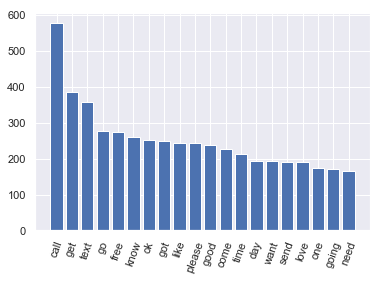

In [31]:
plt.bar(range(20), [val[1] for val in s[0:20]], align='center')
plt.xticks(range(20), [val[0] for val in s[0:20]])
plt.xticks(rotation=70)
plt.show()

In [32]:
x=data1.groupby("type")
x=x.get_group("spam")

In [33]:
s=dict()
def abc(l):
    for i in l:
        if i in s:
            s[i]+=1
        else:
            s[i]=1
            
x["clean_no_sw"].apply(abc)
s=sorted(s.items(), key=lambda x: x[1],reverse=True)[:50]

In [34]:
s

[('call', 346),
 ('text', 277),
 ('free', 217),
 ('mobile', 123),
 ('stop', 114),
 ('claim', 113),
 ('reply', 104),
 ('prize', 92),
 ('get', 84),
 ('new', 69),
 ('send', 68),
 ('nokia', 65),
 ('please', 63),
 ('cash', 62),
 ('urgent', 62),
 ('win', 60),
 ('contact', 56),
 ('service', 55),
 ('week', 53),
 ('guaranteed', 50),
 ('customer', 49),
 ('tone', 48),
 ('phone', 45),
 ('per', 44),
 ('chat', 43),
 ('cs', 41),
 ('draw', 39),
 ('awarded', 38),
 ('latest', 36),
 ('å£1000', 35),
 ('mins', 35),
 ('line', 35),
 ('150ppm', 34),
 ('receive', 33),
 ('camera', 33),
 ('every', 33),
 ('holiday', 32),
 ('landline', 32),
 ('shows', 31),
 ('>', 30),
 ('message', 30),
 ('want', 30),
 ('go', 30),
 ('box', 30),
 ('number', 30),
 ('apply', 29),
 ('code', 29),
 ('ringtone', 29),
 ('live', 29),
 ('video', 29)]

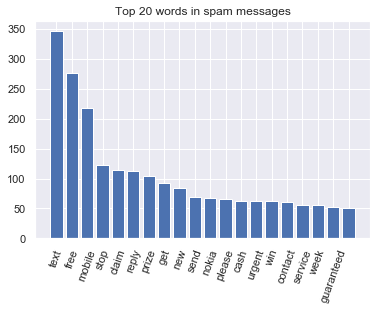

In [35]:
plt.bar(range(20), [val[1] for val in s[:20]], align='center')
plt.xticks(range(20), [val[0] for val in s[1:20]])
plt.title("Top 20 words in spam messages")
plt.xticks(rotation=70)
plt.show()

In [36]:
x=data1.groupby("type")
x=x.get_group("ham")
s=dict()
def abc(l):
    for i in l:
        if i in s:
            s[i]+=1
        else:
            s[i]=1
            
x["clean_no_sw"].apply(abc)
s=sorted(s.items(), key=lambda x: x[1],reverse=True)[:50]

In [37]:
s

[('get', 301),
 ('go', 246),
 ('ok', 246),
 ('got', 242),
 ('know', 234),
 ('like', 231),
 ('call', 230),
 ('good', 227),
 ('come', 225),
 ('time', 195),
 ('please', 181),
 ('love', 180),
 ('day', 176),
 ('going', 168),
 ('one', 167),
 ('want', 163),
 ('home', 158),
 ('lor', 156),
 ('need', 155),
 ('sorry', 155),
 ('still', 147),
 ('da', 140),
 ('see', 137),
 ('later', 133),
 ('back', 129),
 ('think', 128),
 ('today', 124),
 ('send', 123),
 ('tell', 121),
 ('take', 117),
 ('much', 111),
 ('oh', 109),
 ('night', 108),
 ('well', 107),
 ('hope', 105),
 ('happy', 103),
 ('great', 101),
 ('wat', 101),
 ('way', 101),
 ('hey', 99),
 ('na', 96),
 ('work', 94),
 ('give', 92),
 ('dear', 92),
 ('say', 91),
 ('already', 89),
 ('right', 88),
 ('make', 88),
 ('ask', 88),
 ('said', 88)]

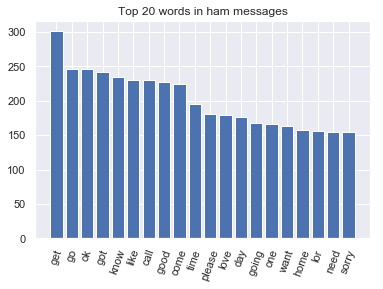

In [38]:
plt.bar(range(20), [val[1] for val in s[:20]], align='center')
plt.xticks(range(20), [val[0] for val in s[:20]])
plt.xticks(rotation=70)
plt.title("Top 20 words in ham messages")
plt.show()

In [39]:
data1

,type,words,clean_words,clean_no_sw
0,ham,"[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,...","[go, jurong, point, crazy.., available, bugis,..."
1,ham,"[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, joking, wif, you, oni]","[ok, lar, joking, wif, oni]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, wkly, comp, to, win, fa, cup...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[u, dun, say, so, early, hor, ..., u, c, alrea...","[you, dun, say, so, early, hor, you, already, ...","[dun, say, early, hor, already, say]"
4,ham,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah, do, not, think, he, goes, to, usf, he, l...","[nah, think, goes, usf, lives, around, though]"
5,spam,"[freemsg, hey, there, darling, it, 's, been, 3...","[freemsg, hey, there, darling, it, is, been, w...","[freemsg, hey, darling, week, word, back, 'd, ..."
6,ham,"[even, my, brother, is, not, like, to, speak, ...","[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
7,ham,"[as, per, your, request, 'melle, melle, (, oru...","[as, per, your, request, 'melle, melle, oru, m...","[per, request, 'melle, melle, oru, minnaminung..."
8,spam,"[winner, !, !, as, a, valued, network, custome...","[winner, as, valued, network, customer, you, h...","[winner, valued, network, customer, selected, ..."
9,spam,"[had, your, mobile, 11, months, or, more, ?, u...","[had, your, mobile, 11, months, or, more, you,...","[mobile, 11, months, entitled, update, latest,..."


In [40]:
data2=pd.DataFrame()
data2["type"]=data1["type"].apply(lambda x:1 if x=="spam" else 0)
data2["message"]=data1["clean_no_sw"]
trainingSet, testSet = train_test_split(data2, test_size=0.2)

In [41]:
x=testSet.groupby("type")


In [42]:
list(x)

[(0,       type                                            message
  5049     0                    [vote, wherever, heart, guides]
  1394     0                  [still, meeting, dinner, tonight]
  3477     0                    [ask, around, lot, terms, mids]
  3540     0                                [coughing, nothing]
  4534     0                      [im, late, tellmiss, im, way]
  86       0  [real, getting, yo, need, tickets, one, jacket...
  2272     0         [haha, awesome, 4u, couple, times, coming]
  3411     0                 [didnt, search, online, let, know]
  901      0                                  [possible, teach]
  5199     0             [ugh, leg, hurts, musta, overdid, mon]
  2193     0  [called, one, pick, phone, ask, already, said,...
  5072     0  [gud, ni8, dear..slp, well..take, care..swt, d...
  1866     0                        [go, buy, wif, meet, later]
  3293     0  [beautiful, tomorrow, never, comes.., comes, a...
  4678     0                   [sry, 

In [43]:
from gensim.models import FastText
model_ted = FastText(data1["clean_no_sw"], size=100, window=5, min_count=5, workers=4,sg=1)

In [47]:
model_ted.wv.most_similar("lor")

[('got', 0.9986585378646851),
 ('watching', 0.9983111023902893),
 ('go', 0.9980507493019104),
 ('want', 0.9970980286598206),
 ('wat', 0.9970942735671997),
 ('waking', 0.9969774484634399),
 ('home', 0.9968729019165039),
 ('something', 0.9967321157455444),
 ('way', 0.9967021942138672),
 ('walking', 0.9966262578964233)]

In [50]:
from gensim.models import Doc2Vec
model_ted = Doc2Vec(data1["clean_no_sw"], size=100, window=5, min_count=5, workers=4)

C:\Users\adith\Anaconda3\envs\tf_gpu\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


AttributeError: 'list' object has no attribute 'words'